# Introduction
This following Python program aims to rearrange the given folder and its subfolders in ordered way. My intention for creating this program is that I have a large collection of Videos and some of them are in folers others are without any folder, some program have subtitle and there are duplicate Videos present also there is a problem with the name of the files. So I'm Writing this program so that every file have a correct name and folder with subtitle file with the same name. I will also try to prepare a log file for the activities that are being performed and another log file for missing srt(subtitle file) files.

In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Extraction

In [36]:
def ret_content(path):
    if not path.endswith('/'):
        path += '/'
    files = []
    file_paths = []
    
    for file in os.listdir(path):
        if os.path.isdir(path+file) and not file.startswith('.'):
            rec_file, rec_path = ret_c(path+file)
            files.extend(rec_file)
            file_paths.extend(rec_path)
        else:
            file_name, extension = os.path.splitext(file)
            files += [(file_name, extension)]
            file_paths.append(path+file)
            
    return files, file_paths

In [37]:
files, file_paths = ret_content('/media/ketan/Seagate Expansion Drive/Movies/Hollywood')
# files, file_paths = ret_content("/home/ketan/Videos/vehicles")

In [38]:
for i in range(10):
    print(files[i])

('Mission Impossible 4', '.mkv')
('Mission Impossible Rogue Nation', '.mkv')
('Mission Impossible', '.mkv')
('71.2014.720p.BluRay.x264.YIFY', '.mp4')
('(2005)The Exorcism of Emily Rose', '.mp4')
('000 Point Break', '.mkv')
('03 Last Crusade - Harrison Ford Adventure Eng [H264-mp4]', '.mp4')
('17.Again.2009.720p.BrRip.x264.YIFY', '.mp4')
('17.Again.2009.720p.BrRip.x264.YIFY', '.srt')
('WWW.YIFY-TORRENTS.COM', '.jpg')


In [39]:
for i in range(10):
    print(file_paths[i])

/media/ketan/Seagate Expansion Drive/Movies/Hollywood/Mission Impossible/Mission Impossible 4.mkv
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/Mission Impossible/Mission Impossible Rogue Nation.mkv
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/Mission Impossible/Mission Impossible.mkv
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/'71 (2014)/71.2014.720p.BluRay.x264.YIFY.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/(2005)The Exorcism of Emily Rose.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/000 Point Break.mkv
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/03 Last Crusade - Harrison Ford Adventure Eng [H264-mp4].mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/17 Again (2009)/17.Again.2009.720p.BrRip.x264.YIFY.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/17 Again (2009)/17.Again.2009.720p.BrRip.x264.YIFY.srt
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/17 Again (2009)/WWW.YIFY-TORRENTS.COM.jpg


# Files Needing Renaming
some of the file contain spam texts. We need to replace them with correct one or remove them.

one of the feature that I have observed is file names which contain spam text usually have special characters.

In [28]:
def has_special_char(text: str) -> bool:
    return any(c for c in text if not c.isalnum() and not c.isspace())

In [29]:
defaulters = []
for path in file_paths:
    file = path.split('/')[-1]
    file_name, extension = os.path.splitext(file)
    if has_special_char(file_name): defaulters.append(path)
for i in range(10):
    print(defaulters[i])

/media/ketan/Seagate Expansion Drive/Movies/Hollywood/'71 (2014)/71.2014.720p.BluRay.x264.YIFY.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/(2005)The Exorcism of Emily Rose.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/03 Last Crusade - Harrison Ford Adventure Eng [H264-mp4].mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/17 Again (2009)/17.Again.2009.720p.BrRip.x264.YIFY.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/17 Again (2009)/17.Again.2009.720p.BrRip.x264.YIFY.srt
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/17 Again (2009)/WWW.YIFY-TORRENTS.COM.jpg
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/310 to Yuma (2007)/310.to.Yuma.2007.720p.BrRip.x264.BOKUTOX.YIFY.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/310 to Yuma (2007)/Catch Me If You Can (2002)/Catch.Me.If.You.Can.2002.720p.BluRay.x264.YIFY.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/310 to Yuma (2007)/Catch Me If You Can (2002)/WWW.YIF

In [30]:
print(len(defaulters), " number of files need renaming out of", len(files))

543  number of files need renaming out of 1055


# Files with same name

In [31]:
only_file_name = []
for file ,ext in files:
    only_file_name.append(file)
only_file_name.sort()
for i in only_file_name:
    print(i)

(2005)The Exorcism of Emily Rose
(sample) Dil Se (1998) ~2CD DvDRip x264 AC3 5.1 [DDR]
000 Point Break
03 Last Crusade - Harrison Ford Adventure Eng [H264-mp4]
1
1
10
10.PART 1 PIRATES OF THE CARIBBEAN
10.PART 2 PIRATES OF THE CARIBBEAN
10.PART 3 PIRATES OF THE CARIBBEAN
11
12
13
14
17.Again.2009.720p.BrRip.x264.YIFY
17.Again.2009.720p.BrRip.x264.YIFY
2
2
2.Fast.2.Furious.2003.720p.BrRip.x264.YIFY+HI
2.Fast.2.Furious.2003.720p.BrRip.x264.YIFY+HI
3
3
3 Musketeers
300
300
300  Rise
300 Rise of an Empire
310.to.Yuma.2007.720p.BrRip.x264.BOKUTOX.YIFY
3B34b13.WorldFree4u.Com
4
4
5
5
5_6246876172202803325
6
6
7
7
71.2014.720p.BluRay.x264.YIFY
8
8
9
A Beautiful Mind
A DDR Exclusive Release
A DDR Release !!!
A Death in the Gunj
A Good Day to Die Hard
A Man Aprt
A Nightmare On Elm Street (2010) www.khatrimaza.org BRRip 1080p Dual Audio
A.Dog's.Purpose.2017.720p.BluRay.x264-[YTS.AG]
A.Monster.Calls.2016.720p.BluRay.x264-[YTS.AG]
AVSEQ 01
AVSEQ 01
About Time
Abraham Lincoln Vampire Hunter 
Ace Ve

# Data Visualization

In [32]:
data = pd.DataFrame(files, columns = ['file_name', 'extension'])
data.head()

,file_name,extension
0,Mission Impossible 4,.mkv
1,Mission Impossible Rogue Nation,.mkv
2,Mission Impossible,.mkv
3,71.2014.720p.BluRay.x264.YIFY,.mp4
4,(2005)The Exorcism of Emily Rose,.mp4


In [33]:
for i in data.extension.unique():
    print(i)

.mkv
.mp4
.srt
.jpg
.avi
.bc!
.txt
.db
.ini
.MKV
.idx
.sub
.ass
.dat
.zip
.FLV
.nfo
.flv


Some of them are not even file extension. so we need to filter them.

In [34]:
extension_count = []
for ext in data.extension.unique():
    c = data[data.extension == ext].count()
    extension_count.append(c.extension)
extension_count

[370, 284, 148, 123, 34, 4, 64, 7, 2, 2, 2, 2, 1, 4, 2, 3, 2, 1]

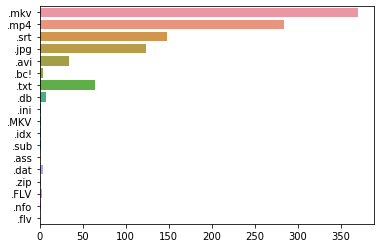

In [35]:
sns.barplot(extension_count, list(data.extension.unique()), )

# Extracting file and folder information

Finding out which file is inside a folder with same name or not.
for files which don't have folders create and move the files into folders.
do the same for srt files.

In [ ]:
def compare_folder_file(folder_name, file_name):
    folder_name = folder_name.split(" ")
    file_name = file_name.split(" ")
    
    word_matched = 0
    
    for i, j in zip(folder_name, file_name):
        if j.lower() in i.lower():
            word_matched += 1
    if word_matched > 0: return False
    else: return True

In [ ]:
without_folders = []
for path in file_paths:
    temp = path.split('/')
    
    file_name = os.path.splitext(temp[-1])[0]
    folder_name = temp[-2]
#     file_name not in folder_name
    if compare_folder_file(folder_name, file_name):
        without_folders.append(path)
for i in range(10):
    print(without_folders[i])